In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Travellerstrain.csv')
df.head()

,id,cancel,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind
0,1,0,2013,98004.0,blue,37.0,18.000000,high,C,Tenant,950.507336,Broker,F,0.0,2.0,0.0,15.0,0.0
1,2,0,2013,85017.0,white,40.0,17.000000,medium,A,Condo,909.346046,Broker,F,1.0,5.0,0.0,15.0,0.0
2,3,0,2013,80021.0,white,45.0,14.000000,high,A,House,897.084502,Phone,M,0.0,1.0,0.0,14.0,0.0
3,4,0,2013,85002.0,red,45.0,24.366136,high,A,House,979.039007,Phone,M,0.0,5.0,0.0,22.0,1.0
4,5,0,2013,50001.0,yellow,36.0,16.000000,high,C,House,932.379027,Broker,M,1.0,2.0,4.0,4.0,0.0


In [3]:
df['claim.ind'].value_counts()

0.0    838548
1.0    209041
Name: claim.ind, dtype: int64

In [4]:
df.isnull().sum()

id                      0
cancel                  0
year                    0
zip.code              951
house.color           945
ni.age               1002
len.at.res            967
credit                907
coverage.type         980
dwelling.type         993
premium               957
sales.channel        1025
ni.gender             960
ni.marital.status     994
n.adults              931
n.children            938
tenure                980
claim.ind             986
dtype: int64

In [4]:
cols_with_missing = (col for col in df.columns if df[col].isnull().any())
for col in cols_with_missing:
    df[col + '_was_missing'] = df[col].isnull()
df.head()

,id,cancel,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,...,coverage.type_was_missing,dwelling.type_was_missing,premium_was_missing,sales.channel_was_missing,ni.gender_was_missing,ni.marital.status_was_missing,n.adults_was_missing,n.children_was_missing,tenure_was_missing,claim.ind_was_missing
0,1,0,2013,98004.0,blue,37.0,18.000000,high,C,Tenant,...,False,False,False,False,False,False,False,False,False,False
1,2,0,2013,85017.0,white,40.0,17.000000,medium,A,Condo,...,False,False,False,False,False,False,False,False,False,False
2,3,0,2013,80021.0,white,45.0,14.000000,high,A,House,...,False,False,False,False,False,False,False,False,False,False
3,4,0,2013,85002.0,red,45.0,24.366136,high,A,House,...,False,False,False,False,False,False,False,False,False,False
4,5,0,2013,50001.0,yellow,36.0,16.000000,high,C,House,...,False,False,False,False,False,False,False,False,False,False


In [5]:
df['zip.code'] = df['zip.code'].fillna(np.round(df['zip.code'].median()))
df.head()

,id,cancel,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,...,coverage.type_was_missing,dwelling.type_was_missing,premium_was_missing,sales.channel_was_missing,ni.gender_was_missing,ni.marital.status_was_missing,n.adults_was_missing,n.children_was_missing,tenure_was_missing,claim.ind_was_missing
0,1,0,2013,98004.0,blue,37.0,18.000000,high,C,Tenant,...,False,False,False,False,False,False,False,False,False,False
1,2,0,2013,85017.0,white,40.0,17.000000,medium,A,Condo,...,False,False,False,False,False,False,False,False,False,False
2,3,0,2013,80021.0,white,45.0,14.000000,high,A,House,...,False,False,False,False,False,False,False,False,False,False
3,4,0,2013,85002.0,red,45.0,24.366136,high,A,House,...,False,False,False,False,False,False,False,False,False,False
4,5,0,2013,50001.0,yellow,36.0,16.000000,high,C,House,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df['ni.marital.status'].value_counts()

1.0    743748
0.0    303833
Name: ni.marital.status, dtype: int64

In [8]:
df['cancel'].value_counts()

 0    792026
 1    253097
-1      3452
Name: cancel, dtype: int64

In [6]:
df = df.drop(['id'], axis=1)
df = df.loc[(df['cancel'] !=-1)]
df['zip.code'] = df['zip.code'].fillna(np.round(df['zip.code'].median()))
df['house.color'] = df['house.color'].fillna('white')
df['ni.age'] = df['ni.age'].fillna(np.round(df['ni.age'].median()))
df['len.at.res'] = df['len.at.res'].fillna(np.round(df['len.at.res'].median()))
df['credit'] = df['credit'].fillna('high')
df['coverage.type'] = df['coverage.type'].fillna('C')
df['dwelling.type'] = df['dwelling.type'].fillna('House')
df['premium'] = df['premium'].fillna(np.round(df['premium'].median()))
df['sales.channel'] = df['sales.channel'].fillna('Broker')
df['ni.gender'] = df['ni.gender'].fillna('M')
df['ni.marital.status'] = df['ni.marital.status'].fillna(df['ni.marital.status'].mode())
df['n.adults'] = df['n.adults'].fillna(np.round(df['n.adults'].mode()))
df['n.children'] = df['n.children'].fillna(np.round(df['n.children'].median()))
df['tenure'] = df['tenure'].fillna(np.round(df['tenure'].median()))
df['claim.ind'] = df['claim.ind'].fillna(np.round(df['claim.ind'].median()))

In [7]:
df_lat_long = pd.read_excel('ZIPCODES.xlsx')
df_lat_long.head()

,RecordNumber,Zipcode,ZipCodeType,City,State,LocationType,Lat,Long,Xaxis,Yaxis,Zaxis,WorldRegion,Country,LocationText,Location,Decommisioned,TaxReturnsFiled,EstimatedPopulation,TotalWages,Notes
0,1,704.0,STANDARD,PARC PARQUE,PR,NOT ACCEPTABLE,17.96,-66.22,0.38,-0.87,0.3,NaN,US,"Parc Parque, PR",NA-US-PR-PARC PARQUE,False,NaN,NaN,NaN,NaN
1,2,705.0,STANDARD,PASEO COSTA DEL SUR,PR,NOT ACCEPTABLE,17.96,-66.22,0.38,-0.87,0.3,NaN,US,"Paseo Costa Del Sur, PR",NA-US-PR-PASEO COSTA DEL SUR,False,NaN,NaN,NaN,NaN
2,3,610.0,STANDARD,SECT LANAUSSE,PR,NOT ACCEPTABLE,17.96,-66.22,0.38,-0.87,0.3,NaN,US,"Sect Lanausse, PR",NA-US-PR-SECT LANAUSSE,False,NaN,NaN,NaN,NaN
3,4,611.0,STANDARD,URB EUGENE RICE,PR,NOT ACCEPTABLE,17.96,-66.22,0.38,-0.87,0.3,NaN,US,"Urb Eugene Rice, PR",NA-US-PR-URB EUGENE RICE,False,NaN,NaN,NaN,NaN
4,5,612.0,STANDARD,URB GONZALEZ,PR,NOT ACCEPTABLE,17.96,-66.22,0.38,-0.87,0.3,NaN,US,"Urb Gonzalez, PR",NA-US-PR-URB GONZALEZ,False,NaN,NaN,NaN,NaN


In [8]:
df_lat_long = df_lat_long.drop(['RecordNumber','ZipCodeType','City','LocationType','Xaxis','Yaxis','Zaxis','WorldRegion','Country','LocationText','Location','Decommisioned','TaxReturnsFiled','EstimatedPopulation','TotalWages','Notes'], axis=1)

In [9]:
df = df.rename(columns={'zip.code' : 'Zipcode'})
df.head()

,cancel,year,Zipcode,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,...,coverage.type_was_missing,dwelling.type_was_missing,premium_was_missing,sales.channel_was_missing,ni.gender_was_missing,ni.marital.status_was_missing,n.adults_was_missing,n.children_was_missing,tenure_was_missing,claim.ind_was_missing
0,0,2013,98004.0,blue,37.0,18.000000,high,C,Tenant,950.507336,...,False,False,False,False,False,False,False,False,False,False
1,0,2013,85017.0,white,40.0,17.000000,medium,A,Condo,909.346046,...,False,False,False,False,False,False,False,False,False,False
2,0,2013,80021.0,white,45.0,14.000000,high,A,House,897.084502,...,False,False,False,False,False,False,False,False,False,False
3,0,2013,85002.0,red,45.0,24.366136,high,A,House,979.039007,...,False,False,False,False,False,False,False,False,False,False
4,0,2013,50001.0,yellow,36.0,16.000000,high,C,House,932.379027,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df['year'] = df['year'].replace(2013,0)
df['year'] = df['year'].replace(2014,1)
df['year'] = df['year'].replace(2015,2)
df['year'] = df['year'].replace(2016,3)

In [11]:
df = pd.merge(df, df_lat_long, on='Zipcode', how='inner')
df.tail()

,cancel,year,Zipcode,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,...,sales.channel_was_missing,ni.gender_was_missing,ni.marital.status_was_missing,n.adults_was_missing,n.children_was_missing,tenure_was_missing,claim.ind_was_missing,State,Lat,Long
1045118,0,3,85019.0,white,54.0,13.0,high,A,House,921.378603,...,False,False,False,False,False,False,False,WV,38.35,-81.63
1045119,1,3,85019.0,white,53.0,12.0,medium,B,House,933.553821,...,False,False,False,False,False,False,False,WV,38.35,-81.63
1045120,0,0,85019.0,white,38.0,15.0,medium,B,House,1013.695046,...,False,False,False,False,False,False,False,WV,38.35,-81.63
1045121,1,0,85019.0,yellow,39.0,16.0,high,C,Tenant,765.916822,...,False,False,False,False,False,False,False,WV,38.35,-81.63
1045122,0,0,85019.0,blue,46.0,20.0,high,B,Condo,863.240019,...,False,False,False,False,False,False,False,WV,38.35,-81.63


In [12]:
df['ni.marital.status'] = df['ni.marital.status'].fillna(1.0)

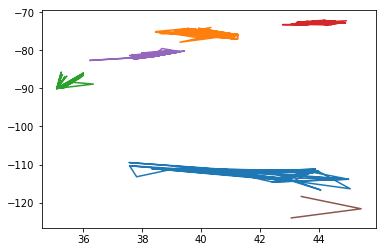

In [17]:
from sklearn.cluster import KMeans
from collections import Counter
m=df.loc[:,['Lat','Long']]
id_n=6
kmeans = KMeans(n_clusters=id_n, random_state=0).fit(m)
id_label=kmeans.labels_
for i in range(id_n):
    cluster=np.where(id_label==i)[0]
    plt.plot(m.Lat[cluster].values,m.Long[cluster].values)
plt.show()

In [14]:
df = df.rename(columns={'Lat' : 'LAT'})
df = df.rename(columns={'Long' : 'LNG'})
df.loc[(df['LNG']<-85) & (df['LNG']>-91), 'a'] = '1'
df.loc[(df['LNG']>-75) & (df['LAT']>42), 'b'] = '1'

df.loc[(df['LNG']>-118) & (df['LNG']<-108), 'c'] = '1'
df.loc[(df['LNG']<=-118), 'd'] = '1'
df.loc[(df['LAT']>=36) & (df['LAT']<=40) & (df['LNG']>-85) & (df['LNG']<-79), 'e'] = '1'
df.loc[(df['LAT']>38) & (df['LAT']<42) & (df['LNG']>-79) & (df['LNG']<-72), 'f'] = '1'

df.head()

,cancel,year,Zipcode,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,...,claim.ind_was_missing,State,LAT,LNG,a,b,c,d,e,f
0,0,0,98004.0,blue,37.0,18.0,high,C,Tenant,950.507336,...,False,TN,35.44,-86.78,1,NaN,NaN,NaN,NaN,NaN
1,0,0,98004.0,white,64.0,15.0,medium,B,House,969.846275,...,False,TN,35.44,-86.78,1,NaN,NaN,NaN,NaN,NaN
2,0,0,98004.0,white,67.0,6.0,high,C,House,995.128563,...,False,TN,35.44,-86.78,1,NaN,NaN,NaN,NaN,NaN
3,0,0,98004.0,blue,51.0,11.0,medium,C,House,976.801395,...,False,TN,35.44,-86.78,1,NaN,NaN,NaN,NaN,NaN
4,0,0,98004.0,yellow,48.0,13.0,high,B,Tenant,938.002075,...,False,TN,35.44,-86.78,1,NaN,NaN,NaN,NaN,NaN


In [15]:
df['a'].fillna(0, inplace=True)
df['b'].fillna(0, inplace=True)
df['c'].fillna(0, inplace=True)
df['d'].fillna(0, inplace=True)
df['e'].fillna(0, inplace=True)
df['f'].fillna(0, inplace=True)
df.head()

,cancel,year,Zipcode,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,...,claim.ind_was_missing,State,LAT,LNG,a,b,c,d,e,f
0,0,0,98004.0,blue,37.0,18.0,high,C,Tenant,950.507336,...,False,TN,35.44,-86.78,1,0,0,0,0,0
1,0,0,98004.0,white,64.0,15.0,medium,B,House,969.846275,...,False,TN,35.44,-86.78,1,0,0,0,0,0
2,0,0,98004.0,white,67.0,6.0,high,C,House,995.128563,...,False,TN,35.44,-86.78,1,0,0,0,0,0
3,0,0,98004.0,blue,51.0,11.0,medium,C,House,976.801395,...,False,TN,35.44,-86.78,1,0,0,0,0,0
4,0,0,98004.0,yellow,48.0,13.0,high,B,Tenant,938.002075,...,False,TN,35.44,-86.78,1,0,0,0,0,0


In [16]:
df_stat = pd.get_dummies(df['State'])
df = pd.concat([df, df_stat], axis=1)
df.head()

,cancel,year,Zipcode,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,...,f,DE,ID,NJ,OR,PA,TN,UT,VT,WV
0,0,0,98004.0,blue,37.0,18.0,high,C,Tenant,950.507336,...,0,0,0,0,0,0,1,0,0,0
1,0,0,98004.0,white,64.0,15.0,medium,B,House,969.846275,...,0,0,0,0,0,0,1,0,0,0
2,0,0,98004.0,white,67.0,6.0,high,C,House,995.128563,...,0,0,0,0,0,0,1,0,0,0
3,0,0,98004.0,blue,51.0,11.0,medium,C,House,976.801395,...,0,0,0,0,0,0,1,0,0,0
4,0,0,98004.0,yellow,48.0,13.0,high,B,Tenant,938.002075,...,0,0,0,0,0,0,1,0,0,0


In [17]:
df_col = pd.get_dummies(df['house.color'])
df = pd.concat([df, df_col], axis=1)
df.head()

,cancel,year,Zipcode,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,...,OR,PA,TN,UT,VT,WV,blue,red,white,yellow
0,0,0,98004.0,blue,37.0,18.0,high,C,Tenant,950.507336,...,0,0,1,0,0,0,1,0,0,0
1,0,0,98004.0,white,64.0,15.0,medium,B,House,969.846275,...,0,0,1,0,0,0,0,0,1,0
2,0,0,98004.0,white,67.0,6.0,high,C,House,995.128563,...,0,0,1,0,0,0,0,0,1,0
3,0,0,98004.0,blue,51.0,11.0,medium,C,House,976.801395,...,0,0,1,0,0,0,1,0,0,0
4,0,0,98004.0,yellow,48.0,13.0,high,B,Tenant,938.002075,...,0,0,1,0,0,0,0,0,0,1


In [18]:
df_cha = pd.get_dummies(df['sales.channel'])
df = pd.concat([df, df_cha], axis=1)
df.head()

,cancel,year,Zipcode,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,...,UT,VT,WV,blue,red,white,yellow,Broker,Online,Phone
0,0,0,98004.0,blue,37.0,18.0,high,C,Tenant,950.507336,...,0,0,0,1,0,0,0,1,0,0
1,0,0,98004.0,white,64.0,15.0,medium,B,House,969.846275,...,0,0,0,0,0,1,0,1,0,0
2,0,0,98004.0,white,67.0,6.0,high,C,House,995.128563,...,0,0,0,0,0,1,0,1,0,0
3,0,0,98004.0,blue,51.0,11.0,medium,C,House,976.801395,...,0,0,0,1,0,0,0,0,0,1
4,0,0,98004.0,yellow,48.0,13.0,high,B,Tenant,938.002075,...,0,0,0,0,0,0,1,1,0,0


In [19]:
df['ni.gender'] = df['ni.gender'].replace('F', 0)
df['ni.gender'] = df['ni.gender'].replace('M', 1)
df.head()

,cancel,year,Zipcode,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,...,UT,VT,WV,blue,red,white,yellow,Broker,Online,Phone
0,0,0,98004.0,blue,37.0,18.0,high,C,Tenant,950.507336,...,0,0,0,1,0,0,0,1,0,0
1,0,0,98004.0,white,64.0,15.0,medium,B,House,969.846275,...,0,0,0,0,0,1,0,1,0,0
2,0,0,98004.0,white,67.0,6.0,high,C,House,995.128563,...,0,0,0,0,0,1,0,1,0,0
3,0,0,98004.0,blue,51.0,11.0,medium,C,House,976.801395,...,0,0,0,1,0,0,0,0,0,1
4,0,0,98004.0,yellow,48.0,13.0,high,B,Tenant,938.002075,...,0,0,0,0,0,0,1,1,0,0


In [20]:
df = df.drop(['house.color'], axis=1)
df = df.drop(['sales.channel'], axis=1)
df['credit'] = df['credit'].replace('low', 0)
df['credit'] = df['credit'].replace('medium', 1)
df['credit'] = df['credit'].replace('high', 2)
df['coverage.type'] = df['coverage.type'].replace('A', 0)
df['coverage.type'] = df['coverage.type'].replace('B', 1)
df['coverage.type'] = df['coverage.type'].replace('C', 2)

In [21]:
df['dwelling.type'] = df['dwelling.type'].replace('Tenant', 0)
df['dwelling.type'] = df['dwelling.type'].replace('Condo', 1)
df['dwelling.type'] = df['dwelling.type'].replace('House', 2)

In [22]:
df['blue'] = df['blue'].apply(lambda x: int(x))
df['red'] = df['red'].apply(lambda x: int(x))
df['white'] = df['white'].apply(lambda x: int(x))
df['yellow'] = df['yellow'].apply(lambda x: int(x))
df['Broker'] = df['Broker'].apply(lambda x: int(x))
df['Online'] = df['Online'].apply(lambda x: int(x))
df['Phone'] = df['Phone'].apply(lambda x: int(x))

In [23]:
df['ni.age.bin1'] = pd.cut(df['ni.age'], bins=10, labels=False)
df['premium_bins'] = pd.cut(df['premium'], bins=3, labels=False)
df['len_bins'] = pd.cut(df['len.at.res'], bins=3, labels=False)
df['tenure_bins'] = pd.cut(df['tenure'], bins=4, labels=False)
df['Fam_Size'] = df['n.adults'] + df['n.children']
df['fam_size_bins'] = pd.cut(df['Fam_Size'], bins=4, labels=False)

In [24]:
df= df.drop(['Zipcode'], axis=1)

In [25]:
y=df.cancel

In [26]:
X = df.drop(['cancel'], axis=1)

In [27]:
from sklearn.metrics import accuracy_score, log_loss, mean_squared_error as mse
from sklearn import model_selection
kf = model_selection.KFold()
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


/bin/anaconda3/envs/ai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [32]:
X.isnull().sum()

year                               0
ni.age                             0
len.at.res                         0
credit                             0
coverage.type                      0
dwelling.type                      0
premium                            0
ni.gender                          0
ni.marital.status                  0
n.adults                         929
n.children                         0
tenure                             0
claim.ind                          0
zip.code_was_missing               0
house.color_was_missing            0
ni.age_was_missing                 0
len.at.res_was_missing             0
credit_was_missing                 0
coverage.type_was_missing          0
dwelling.type_was_missing          0
premium_was_missing                0
sales.channel_was_missing          0
ni.gender_was_missing              0
ni.marital.status_was_missing      0
n.adults_was_missing               0
n.children_was_missing             0
tenure_was_missing                 0
c

In [29]:
X['n.adults'] = X['n.adults'].fillna(1.0)
X['Fam_Size'] = X['Fam_Size'].fillna(X['Fam_Size'].median())
X['fam_size_bins'] = X['fam_size_bins'].fillna(0.0)

In [ ]:
models = ['GBC', 'ADB', 'ETC', 'RFC']
clfs = [GradientBoostingClassifier(random_state=seed), AdaBoostClassifier(random_state=seed), ExtraTreesClassifier(), RandomForestClassifier(random_state=seed, njobs=-1)]

In [28]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes = (10,10,10), max_iter = 1000)
from sklearn.ensemble import VotingClassifier
models2 = VotingClassifier(estimators=[('ada', AdaBoostClassifier()), ('gbc', GradientBoostingClassifier()), ('mlp', mlp)], voting='soft')

In [31]:
from sklearn.metrics import roc_auc_score


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [ ]:

models2.fit(X_train, y_train)
print('Mod 2 LogLoss {score}'.format(score=roc_auc_score(y_test, models2.predict_proba(X_test)[:,1])))

In [36]:
X.columns

Index(['ni.age', 'len.at.res', 'credit', 'coverage.type', 'dwelling.type',
       'premium', 'ni.gender', 'ni.marital.status', 'n.adults', 'n.children',
       'tenure', 'claim.ind', 'zip.code_was_missing',
       'house.color_was_missing', 'ni.age_was_missing',
       'len.at.res_was_missing', 'credit_was_missing',
       'coverage.type_was_missing', 'dwelling.type_was_missing',
       'premium_was_missing', 'sales.channel_was_missing',
       'ni.gender_was_missing', 'ni.marital.status_was_missing',
       'n.adults_was_missing', 'n.children_was_missing', 'tenure_was_missing',
       'claim.ind_was_missing', 'LAT', 'LNG', 'a', 'b', 'c', 'd', 'e', 'f',
       'DE', 'ID', 'NJ', 'OR', 'PA', 'TN', 'UT', 'VT', 'WV', 'blue', 'red',
       'white', 'yellow', 'Broker', 'Online', 'Phone', 'ni.age.bin1',
       'premium_bins', 'len_bins', 'tenure_bins', 'Fam_Size', 'fam_size_bins'],
      dtype='object')

In [37]:
X=X.drop(['ni.age', 'dwelling.type', 'ni.gender', 'zip.code_was_missing','house.color_was_missing', 'ni.age_was_missing','len.at.res_was_missing', 'credit_was_missing','coverage.type_was_missing', 'dwelling.type_was_missing',
'premium_was_missing', 'sales.channel_was_missing',
       'ni.gender_was_missing', 'ni.marital.status_was_missing',
       'n.adults_was_missing', 'n.children_was_missing', 'tenure_was_missing',
       'claim.ind_was_missing', 'a', 'd', 'e', 'f',
       'DE', 'ID', 'NJ', 'OR', 'PA', 'TN', 'UT', 'WV', 'blue', 'red',
       'white', 'yellow', 'Online',
       'premium_bins', 'len_bins', 'tenure_bins'], axis=1)

In [39]:
clf5 = GradientBoostingClassifier(max_depth = 6)
clf5.fit(X_train,y_train)
print('GBC AUC {score}'.format(score=roc_auc_score(y_test, clf5.predict_proba(X_test)[:,1])))

GBC AUC 0.7255493807090825


In [ ]:
clf3 = AdaBoostClassifier(learning_rate=0.7)
clf3.fit(X_train,y_train)
print('Ada AUC {score}'.format(score=roc_auc_score(y_test, clf3.predict_proba(X_test)[:,1])))

In [68]:
clf8 = GradientBoostingClassifier(max_depth = 10, n_estimators=150, min_samples_split = 4, max_features=0.8)
clf8.fit(X_train,y_train)
print('GBC AUC {score}'.format(score=roc_auc_score(y_test, clf8.predict_proba(X_test)[:,1])))

GBC AUC 0.7286519586540915


In [ ]:
clf4 = MLPClassifier()
clf4.fit(X_train,y_train)
print('Ada AUC {score}'.format(score=roc_auc_score(y_test, clf4.predict_proba(X_test)[:,1])))

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
clf1 = ExtraTreesClassifier(max_features=0.8)
clf2 = RandomForestClassifier(n_estimators=20)
clf3 = AdaBoostClassifier(learning_rate=0.7)
clf4 = MLPClassifier()
clf5 = GradientBoostingClassifier(max_depth=6)


clfs=[]
clf1.fit(X_train,y_train)
print('ETC AUC {score}'.format(score=roc_auc_score(y_test, clf1.predict_proba(X_test)[:,1])))
clf2.fit(X_train,y_train)
print('RFC AUC {score}'.format(score=roc_auc_score(y_test, clf2.predict_proba(X_test)[:,1])))
clf3.fit(X_train,y_train)
print('Ada AUC {score}'.format(score=roc_auc_score(y_test, clf3.predict_proba(X_test)[:,1])))
clf4.fit(X_train,y_train)
print('MLP AUC {score}'.format(score=roc_auc_score(y_test, clf4.predict_proba(X_test)[:,1])))
clf5.fit(X_train,y_train)
print('GBC AUC {score}'.format(score=roc_auc_score(y_test, clf5.predict_proba(X_test)[:,1])))

clfs.append(clf1)
clfs.append(clf2)
clfs.append(clf3)
clfs.append(clf4)
clfs.append(clf5)
predictions = []
for clf in clfs:
    predictions.append(clf.predict_proba(X_test))

ETC AUC 0.6533400329052531
RFC AUC 0.6845668875509878
Ada AUC 0.7294845545495815
MLP AUC 0.7261315288341251
GBC AUC 0.7327980835037265


In [63]:
from sklearn.ensemble import VotingClassifier
models = VotingClassifier(estimators = [('etc', clf1), ('rfc', clf2), ('ada', clf3), ('mlp', clf4), ('gbc', clf5)], voting='soft', weights = [0.01754542, 0.00588046, 0.20543381, 0.33492024, 0.43622007])

In [64]:
models.fit(X_train, y_train)
print('Mod  AUC {score}'.format(score=roc_auc_score(y_test, models.predict_proba(X_test)[:,1])))

Mod  AUC 0.7318847240421711


In [33]:

import scipy
from scipy.optimize import minimize
from sklearn.metrics import log_loss
def log_loss_func(weights, sign=-1):
    final_prediction = 0
    for weight, prediction in zip(weights, predictions):
            final_prediction += weight*prediction
    print(y_test, final_prediction)
    return sign*(roc_auc_score(y_test, final_prediction[:,1]))

starting_values = [0.5]*len(predictions)
cons = ({'type':'eq','fun':lambda w: 1-sum(w)})
bounds = [(0,1)]*len(predictions)
res = minimize(log_loss_func, starting_values, method='SLSQP', bounds=bounds, constraints=cons)

print('Ensemble Score: {best_score}'.format(best_score=res['fun']))
print('Best Weights: {weights}'.format(weights=res['x']))

45535      0
832747     1
22595      0
1035844    0
631434     0
799831     1
938959     1
101517     0
839578     0
488764     1
311106     0
270558     1
928686     0
144233     0
343601     0
170515     0
245690     0
389658     0
104345     1
324608     0
879776     0
565633     0
696593     0
301660     1
793564     1
315751     0
584114     1
101179     1
727035     0
274859     1
          ..
744750     0
893090     1
339900     0
292391     1
66133      1
951840     1
208804     0
191358     0
544343     0
935444     0
184938     0
28175      0
913806     0
1019071    0
477532     0
116336     1
777742     0
326034     1
944778     0
843560     0
52606      1
97681      0
249375     0
714902     0
249807     0
467068     0
457        0
585754     0
945051     0
969619     1
Name: cancel, Length: 261281, dtype: int64 [[1.79852324 0.70147676]
 [1.69420386 0.80579614]
 [1.95603531 0.54396469]
 ...
 [1.99247195 0.50752805]
 [1.99116131 0.50883869]
 [1.71948509 0.78051491]]
45535   

45535      0
832747     1
22595      0
1035844    0
631434     0
799831     1
938959     1
101517     0
839578     0
488764     1
311106     0
270558     1
928686     0
144233     0
343601     0
170515     0
245690     0
389658     0
104345     1
324608     0
879776     0
565633     0
696593     0
301660     1
793564     1
315751     0
584114     1
101179     1
727035     0
274859     1
          ..
744750     0
893090     1
339900     0
292391     1
66133      1
951840     1
208804     0
191358     0
544343     0
935444     0
184938     0
28175      0
913806     0
1019071    0
477532     0
116336     1
777742     0
326034     1
944778     0
843560     0
52606      1
97681      0
249375     0
714902     0
249807     0
467068     0
457        0
585754     0
945051     0
969619     1
Name: cancel, Length: 261281, dtype: int64 [[0.71816622 0.2818338 ]
 [0.67408825 0.32591177]
 [0.78872239 0.21127762]
 ...
 [0.80310214 0.19689788]
 [0.79916727 0.20083274]
 [0.69044978 0.30955023]]
45535   

45535      0
832747     1
22595      0
1035844    0
631434     0
799831     1
938959     1
101517     0
839578     0
488764     1
311106     0
270558     1
928686     0
144233     0
343601     0
170515     0
245690     0
389658     0
104345     1
324608     0
879776     0
565633     0
696593     0
301660     1
793564     1
315751     0
584114     1
101179     1
727035     0
274859     1
          ..
744750     0
893090     1
339900     0
292391     1
66133      1
951840     1
208804     0
191358     0
544343     0
935444     0
184938     0
28175      0
913806     0
1019071    0
477532     0
116336     1
777742     0
326034     1
944778     0
843560     0
52606      1
97681      0
249375     0
714902     0
249807     0
467068     0
457        0
585754     0
945051     0
969619     1
Name: cancel, Length: 261281, dtype: int64 [[0.71520034 0.28479968]
 [0.67503236 0.32496765]
 [0.79204313 0.20795688]
 ...
 [0.80463021 0.19536981]
 [0.80581362 0.19418639]
 [0.70049016 0.29950985]]
45535   

45535      0
832747     1
22595      0
1035844    0
631434     0
799831     1
938959     1
101517     0
839578     0
488764     1
311106     0
270558     1
928686     0
144233     0
343601     0
170515     0
245690     0
389658     0
104345     1
324608     0
879776     0
565633     0
696593     0
301660     1
793564     1
315751     0
584114     1
101179     1
727035     0
274859     1
          ..
744750     0
893090     1
339900     0
292391     1
66133      1
951840     1
208804     0
191358     0
544343     0
935444     0
184938     0
28175      0
913806     0
1019071    0
477532     0
116336     1
777742     0
326034     1
944778     0
843560     0
52606      1
97681      0
249375     0
714902     0
249807     0
467068     0
457        0
585754     0
945051     0
969619     1
Name: cancel, Length: 261281, dtype: int64 [[0.69901432 0.30098569]
 [0.67106107 0.32893895]
 [0.79479077 0.20520925]
 ...
 [0.80119279 0.19880722]
 [0.81889963 0.18110038]
 [0.72845619 0.27154382]]
45535   

45535      0
832747     1
22595      0
1035844    0
631434     0
799831     1
938959     1
101517     0
839578     0
488764     1
311106     0
270558     1
928686     0
144233     0
343601     0
170515     0
245690     0
389658     0
104345     1
324608     0
879776     0
565633     0
696593     0
301660     1
793564     1
315751     0
584114     1
101179     1
727035     0
274859     1
          ..
744750     0
893090     1
339900     0
292391     1
66133      1
951840     1
208804     0
191358     0
544343     0
935444     0
184938     0
28175      0
913806     0
1019071    0
477532     0
116336     1
777742     0
326034     1
944778     0
843560     0
52606      1
97681      0
249375     0
714902     0
249807     0
467068     0
457        0
585754     0
945051     0
969619     1
Name: cancel, Length: 261281, dtype: int64 [[0.70459832 0.29540168]
 [0.63465575 0.36534425]
 [0.83662283 0.16337717]
 ...
 [0.85024895 0.14975105]
 [0.81352012 0.18647988]
 [0.70640449 0.29359551]]
45535   

45535      0
832747     1
22595      0
1035844    0
631434     0
799831     1
938959     1
101517     0
839578     0
488764     1
311106     0
270558     1
928686     0
144233     0
343601     0
170515     0
245690     0
389658     0
104345     1
324608     0
879776     0
565633     0
696593     0
301660     1
793564     1
315751     0
584114     1
101179     1
727035     0
274859     1
          ..
744750     0
893090     1
339900     0
292391     1
66133      1
951840     1
208804     0
191358     0
544343     0
935444     0
184938     0
28175      0
913806     0
1019071    0
477532     0
116336     1
777742     0
326034     1
944778     0
843560     0
52606      1
97681      0
249375     0
714902     0
249807     0
467068     0
457        0
585754     0
945051     0
969619     1
Name: cancel, Length: 261281, dtype: int64 [[0.70475048 0.29524952]
 [0.63876175 0.36123825]
 [0.8341286  0.1658714 ]
 ...
 [0.84700197 0.15299803]
 [0.81581187 0.18418813]
 [0.71018131 0.28981869]]
45535   

45535      0
832747     1
22595      0
1035844    0
631434     0
799831     1
938959     1
101517     0
839578     0
488764     1
311106     0
270558     1
928686     0
144233     0
343601     0
170515     0
245690     0
389658     0
104345     1
324608     0
879776     0
565633     0
696593     0
301660     1
793564     1
315751     0
584114     1
101179     1
727035     0
274859     1
          ..
744750     0
893090     1
339900     0
292391     1
66133      1
951840     1
208804     0
191358     0
544343     0
935444     0
184938     0
28175      0
913806     0
1019071    0
477532     0
116336     1
777742     0
326034     1
944778     0
843560     0
52606      1
97681      0
249375     0
714902     0
249807     0
467068     0
457        0
585754     0
945051     0
969619     1
Name: cancel, Length: 261281, dtype: int64 [[0.70101396 0.29898605]
 [0.63891415 0.36108586]
 [0.83574441 0.16425561]
 ...
 [0.84689132 0.15310869]
 [0.82052008 0.17947993]
 [0.7184989  0.28150111]]
45535   

45535      0
832747     1
22595      0
1035844    0
631434     0
799831     1
938959     1
101517     0
839578     0
488764     1
311106     0
270558     1
928686     0
144233     0
343601     0
170515     0
245690     0
389658     0
104345     1
324608     0
879776     0
565633     0
696593     0
301660     1
793564     1
315751     0
584114     1
101179     1
727035     0
274859     1
          ..
744750     0
893090     1
339900     0
292391     1
66133      1
951840     1
208804     0
191358     0
544343     0
935444     0
184938     0
28175      0
913806     0
1019071    0
477532     0
116336     1
777742     0
326034     1
944778     0
843560     0
52606      1
97681      0
249375     0
714902     0
249807     0
467068     0
457        0
585754     0
945051     0
969619     1
Name: cancel, Length: 261281, dtype: int64 [[0.69864347 0.30135654]
 [0.63779591 0.36220411]
 [0.84095328 0.15904674]
 ...
 [0.85073571 0.14926431]
 [0.82707792 0.1729221 ]
 [0.7278958  0.27210422]]
45535   

45535      0
832747     1
22595      0
1035844    0
631434     0
799831     1
938959     1
101517     0
839578     0
488764     1
311106     0
270558     1
928686     0
144233     0
343601     0
170515     0
245690     0
389658     0
104345     1
324608     0
879776     0
565633     0
696593     0
301660     1
793564     1
315751     0
584114     1
101179     1
727035     0
274859     1
          ..
744750     0
893090     1
339900     0
292391     1
66133      1
951840     1
208804     0
191358     0
544343     0
935444     0
184938     0
28175      0
913806     0
1019071    0
477532     0
116336     1
777742     0
326034     1
944778     0
843560     0
52606      1
97681      0
249375     0
714902     0
249807     0
467068     0
457        0
585754     0
945051     0
969619     1
Name: cancel, Length: 261281, dtype: int64 [[0.69423419 0.30576582]
 [0.63894786 0.36105215]
 [0.83561789 0.16438212]
 ...
 [0.84397082 0.15602919]
 [0.82608602 0.17391399]
 [0.73043479 0.26956523]]
45535   

45535      0
832747     1
22595      0
1035844    0
631434     0
799831     1
938959     1
101517     0
839578     0
488764     1
311106     0
270558     1
928686     0
144233     0
343601     0
170515     0
245690     0
389658     0
104345     1
324608     0
879776     0
565633     0
696593     0
301660     1
793564     1
315751     0
584114     1
101179     1
727035     0
274859     1
          ..
744750     0
893090     1
339900     0
292391     1
66133      1
951840     1
208804     0
191358     0
544343     0
935444     0
184938     0
28175      0
913806     0
1019071    0
477532     0
116336     1
777742     0
326034     1
944778     0
843560     0
52606      1
97681      0
249375     0
714902     0
249807     0
467068     0
457        0
585754     0
945051     0
969619     1
Name: cancel, Length: 261281, dtype: int64 [[0.69422997 0.30577003]
 [0.63894582 0.36105418]
 [0.8356095  0.1643905 ]
 ...
 [0.84396207 0.15603793]
 [0.82607915 0.17392085]
 [0.73043031 0.26956969]]
45535   

In [34]:
import pandas as pd
test = pd.read_csv(open('Ttest.csv', 'r'))
test.head()

,id,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind
0,1526523,2017,80031.0,blue,59.0,20.000000,high,B,House,838.462391,Broker,M,1.0,1.0,0.0,11.0,0.0
1,1526524,2017,98022.0,blue,58.0,13.000000,high,B,House,959.605385,Phone,F,1.0,1.0,0.0,22.0,1.0
2,1526525,2017,80006.0,red,40.0,9.000000,high,A,House,920.011662,Broker,F,1.0,3.0,1.0,12.0,0.0
3,1526526,2017,50046.0,yellow,47.0,17.000000,high,C,Tenant,880.057645,Broker,M,0.0,2.0,0.0,18.0,0.0
4,1526527,2017,50041.0,blue,39.0,15.658047,low,C,Condo,959.333546,Broker,F,1.0,2.0,6.0,17.0,0.0


In [35]:
cols_with_missing = (col for col in test.columns if test[col].isnull().any())
for col in cols_with_missing:
    test[col + '_was_missing'] = test[col].isnull()
test.head()

,id,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,...,coverage.type_was_missing,dwelling.type_was_missing,premium_was_missing,sales.channel_was_missing,ni.gender_was_missing,ni.marital.status_was_missing,n.adults_was_missing,n.children_was_missing,tenure_was_missing,claim.ind_was_missing
0,1526523,2017,80031.0,blue,59.0,20.000000,high,B,House,838.462391,...,False,False,False,False,False,False,False,False,False,False
1,1526524,2017,98022.0,blue,58.0,13.000000,high,B,House,959.605385,...,False,False,False,False,False,False,False,False,False,False
2,1526525,2017,80006.0,red,40.0,9.000000,high,A,House,920.011662,...,False,False,False,False,False,False,False,False,False,False
3,1526526,2017,50046.0,yellow,47.0,17.000000,high,C,Tenant,880.057645,...,False,False,False,False,False,False,False,False,False,False
4,1526527,2017,50041.0,blue,39.0,15.658047,low,C,Condo,959.333546,...,False,False,False,False,False,False,False,False,False,False


In [36]:
test['zip.code'] = test['zip.code'].fillna(np.round(test['zip.code'].median()))

In [38]:
test['ni.age'].unique()

array([ 59.        ,  58.        ,  40.        ,  47.        ,
        39.        ,  28.        ,  54.        ,  25.        ,
        45.        ,  67.        ,  51.        ,  46.        ,
        42.        ,  32.        ,  61.        ,  48.        ,
        33.        ,  66.        ,  57.        ,  52.        ,
        30.        ,  37.        ,  31.        ,  55.        ,
        44.        ,  43.        ,  64.        ,  50.        ,
        70.        ,  41.        ,  38.        ,  36.        ,
        21.        ,  56.        ,  29.        ,  34.        ,
        85.        ,  27.        ,  60.        ,  26.        ,
        68.        ,  49.        ,  20.        ,  74.        ,
        78.        ,  23.        ,  62.        ,  35.        ,
        53.        ,  24.        ,  80.        ,  63.        ,
        73.        ,  77.        ,  22.        ,  75.        ,
        65.        ,  84.        ,  69.        ,  76.        ,
        81.        ,  19.        ,  72.        ,  88.  

In [37]:
test['house.color'] = test['house.color'].fillna('white')
test['ni.age'] = test['ni.age'].fillna(np.round(test['ni.age'].median()))
test['len.at.res'] = test['len.at.res'].fillna(np.round(test['len.at.res'].median()))
test['credit'] = test['credit'].fillna('high')
test['coverage.type'] = test['coverage.type'].fillna('C')
test['dwelling.type'] = test['dwelling.type'].fillna('House')
test['premium'] = test['premium'].fillna(np.round(test['premium'].median()))
test['sales.channel'] = test['sales.channel'].fillna('Broker')
test['sales.channel'] = test['sales.channel'].fillna('M')
test['ni.marital.status'] = test['ni.marital.status'].fillna(1.0)
test['n.adults'] = test['n.adults'].fillna(1.0)
test['n.children'] = test['n.children'].fillna(np.round(test['n.children'].median()))
test['tenure'] = test['tenure'].fillna(np.round(test['tenure'].median()))
test['claim.ind'] = test['claim.ind'].fillna(0.0)

In [38]:
test = test.rename(columns={'zip.code' : 'Zipcode'})
test.head()

,id,year,Zipcode,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,...,coverage.type_was_missing,dwelling.type_was_missing,premium_was_missing,sales.channel_was_missing,ni.gender_was_missing,ni.marital.status_was_missing,n.adults_was_missing,n.children_was_missing,tenure_was_missing,claim.ind_was_missing
0,1526523,2017,80031.0,blue,59.0,20.000000,high,B,House,838.462391,...,False,False,False,False,False,False,False,False,False,False
1,1526524,2017,98022.0,blue,58.0,13.000000,high,B,House,959.605385,...,False,False,False,False,False,False,False,False,False,False
2,1526525,2017,80006.0,red,40.0,9.000000,high,A,House,920.011662,...,False,False,False,False,False,False,False,False,False,False
3,1526526,2017,50046.0,yellow,47.0,17.000000,high,C,Tenant,880.057645,...,False,False,False,False,False,False,False,False,False,False
4,1526527,2017,50041.0,blue,39.0,15.658047,low,C,Condo,959.333546,...,False,False,False,False,False,False,False,False,False,False


In [39]:
test = pd.merge(test, df_lat_long, on='Zipcode', how='inner')
test.head()

,id,year,Zipcode,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,...,sales.channel_was_missing,ni.gender_was_missing,ni.marital.status_was_missing,n.adults_was_missing,n.children_was_missing,tenure_was_missing,claim.ind_was_missing,State,Lat,Long
0,1526523,2017,80031.0,blue,59.0,20.0,high,B,House,838.462391,...,False,False,False,False,False,False,False,PA,39.95,-75.16
1,1526560,2017,80031.0,white,47.0,14.0,high,B,Condo,937.894098,...,False,False,False,False,False,False,False,PA,39.95,-75.16
2,1526653,2017,80031.0,blue,56.0,17.0,medium,A,Tenant,898.975944,...,False,False,False,False,False,False,False,PA,39.95,-75.16
3,1526664,2017,80031.0,blue,61.0,16.0,high,A,Tenant,989.555599,...,False,False,False,False,False,False,False,PA,39.95,-75.16
4,1972870,2017,80031.0,blue,43.0,14.0,medium,A,Tenant,951.092023,...,False,False,False,False,False,False,False,PA,39.95,-75.16


In [40]:
test['year'] = test['year'].replace(2013,0)
test['year'] = test['year'].replace(2014,1)
test['year'] = test['year'].replace(2015,2)
test['year'] = test['year'].replace(2016,3)
test['year'] = test['year'].replace(2017,4)

In [41]:
test = test.rename(columns={'Lat' : 'LAT'})
test = test.rename(columns={'Long' : 'LNG'})

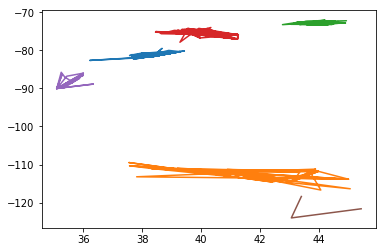

In [44]:
from sklearn.cluster import KMeans
from collections import Counter
n=test.loc[:,['LAT','LNG']]
id_n=6
kmeans = KMeans(n_clusters=id_n, random_state=0).fit(n)
id_label=kmeans.labels_
for i in range(id_n):
    cluster=np.where(id_label==i)[0]
    plt.plot(n.LAT[cluster].values,n.LNG[cluster].values)
plt.show()

In [42]:
test.loc[(test['LNG']<-85) & (test['LNG']>-91), 'a'] = '1'
test.loc[(test['LNG']>-75) & (test['LAT']>42), 'b'] = '1'

test.loc[(test['LNG']>-119) & (test['LNG']<-102), 'c'] = '1'
test.loc[(test['LNG']<-119), 'd'] = '1'
test.loc[(test['LAT']>36) & (test['LAT']<40) & (test['LNG']>-85) & (test['LNG']<-79), 'e'] = '1'
test.loc[(test['LAT']>38) & (test['LAT']<42) & (test['LNG']>-79) & (test['LNG']<-72), 'f'] = '1'

test.head()

,id,year,Zipcode,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,...,claim.ind_was_missing,State,LAT,LNG,a,b,c,d,e,f
0,1526523,4,80031.0,blue,59.0,20.0,high,B,House,838.462391,...,False,PA,39.95,-75.16,NaN,NaN,NaN,NaN,NaN,1
1,1526560,4,80031.0,white,47.0,14.0,high,B,Condo,937.894098,...,False,PA,39.95,-75.16,NaN,NaN,NaN,NaN,NaN,1
2,1526653,4,80031.0,blue,56.0,17.0,medium,A,Tenant,898.975944,...,False,PA,39.95,-75.16,NaN,NaN,NaN,NaN,NaN,1
3,1526664,4,80031.0,blue,61.0,16.0,high,A,Tenant,989.555599,...,False,PA,39.95,-75.16,NaN,NaN,NaN,NaN,NaN,1
4,1972870,4,80031.0,blue,43.0,14.0,medium,A,Tenant,951.092023,...,False,PA,39.95,-75.16,NaN,NaN,NaN,NaN,NaN,1


In [43]:
test['a'].fillna(0, inplace=True)
test['b'].fillna(0, inplace=True)
test['c'].fillna(0, inplace=True)
test['d'].fillna(0, inplace=True)
test['e'].fillna(0, inplace=True)
test['f'].fillna(0, inplace=True)
test.head()

,id,year,Zipcode,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,...,claim.ind_was_missing,State,LAT,LNG,a,b,c,d,e,f
0,1526523,4,80031.0,blue,59.0,20.0,high,B,House,838.462391,...,False,PA,39.95,-75.16,0,0,0,0,0,1
1,1526560,4,80031.0,white,47.0,14.0,high,B,Condo,937.894098,...,False,PA,39.95,-75.16,0,0,0,0,0,1
2,1526653,4,80031.0,blue,56.0,17.0,medium,A,Tenant,898.975944,...,False,PA,39.95,-75.16,0,0,0,0,0,1
3,1526664,4,80031.0,blue,61.0,16.0,high,A,Tenant,989.555599,...,False,PA,39.95,-75.16,0,0,0,0,0,1
4,1972870,4,80031.0,blue,43.0,14.0,medium,A,Tenant,951.092023,...,False,PA,39.95,-75.16,0,0,0,0,0,1


In [44]:
test_stat = pd.get_dummies(test['State'])
test = pd.concat([test, test_stat], axis=1)
test.head()

,id,year,Zipcode,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,...,f,DE,ID,NJ,OR,PA,TN,UT,VT,WV
0,1526523,4,80031.0,blue,59.0,20.0,high,B,House,838.462391,...,1,0,0,0,0,1,0,0,0,0
1,1526560,4,80031.0,white,47.0,14.0,high,B,Condo,937.894098,...,1,0,0,0,0,1,0,0,0,0
2,1526653,4,80031.0,blue,56.0,17.0,medium,A,Tenant,898.975944,...,1,0,0,0,0,1,0,0,0,0
3,1526664,4,80031.0,blue,61.0,16.0,high,A,Tenant,989.555599,...,1,0,0,0,0,1,0,0,0,0
4,1972870,4,80031.0,blue,43.0,14.0,medium,A,Tenant,951.092023,...,1,0,0,0,0,1,0,0,0,0


In [45]:

test = test.drop(['State'], axis=1)

In [46]:
test_col = pd.get_dummies(test['house.color'])
test = pd.concat([test, test_col], axis=1)
test.head()

,id,year,Zipcode,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,...,OR,PA,TN,UT,VT,WV,blue,red,white,yellow
0,1526523,4,80031.0,blue,59.0,20.0,high,B,House,838.462391,...,0,1,0,0,0,0,1,0,0,0
1,1526560,4,80031.0,white,47.0,14.0,high,B,Condo,937.894098,...,0,1,0,0,0,0,0,0,1,0
2,1526653,4,80031.0,blue,56.0,17.0,medium,A,Tenant,898.975944,...,0,1,0,0,0,0,1,0,0,0
3,1526664,4,80031.0,blue,61.0,16.0,high,A,Tenant,989.555599,...,0,1,0,0,0,0,1,0,0,0
4,1972870,4,80031.0,blue,43.0,14.0,medium,A,Tenant,951.092023,...,0,1,0,0,0,0,1,0,0,0


In [47]:
test_cha = pd.get_dummies(test['sales.channel'])
test = pd.concat([test, test_cha], axis=1)
test.head()

,id,year,Zipcode,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,...,UT,VT,WV,blue,red,white,yellow,Broker,Online,Phone
0,1526523,4,80031.0,blue,59.0,20.0,high,B,House,838.462391,...,0,0,0,1,0,0,0,1,0,0
1,1526560,4,80031.0,white,47.0,14.0,high,B,Condo,937.894098,...,0,0,0,0,0,1,0,1,0,0
2,1526653,4,80031.0,blue,56.0,17.0,medium,A,Tenant,898.975944,...,0,0,0,1,0,0,0,0,0,1
3,1526664,4,80031.0,blue,61.0,16.0,high,A,Tenant,989.555599,...,0,0,0,1,0,0,0,0,0,1
4,1972870,4,80031.0,blue,43.0,14.0,medium,A,Tenant,951.092023,...,0,0,0,1,0,0,0,0,0,1


In [48]:
test['ni.gender'] = test['ni.gender'].replace('F', 0)
test['ni.gender'] = test['ni.gender'].replace('M', 1)
test.head()

,id,year,Zipcode,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,...,UT,VT,WV,blue,red,white,yellow,Broker,Online,Phone
0,1526523,4,80031.0,blue,59.0,20.0,high,B,House,838.462391,...,0,0,0,1,0,0,0,1,0,0
1,1526560,4,80031.0,white,47.0,14.0,high,B,Condo,937.894098,...,0,0,0,0,0,1,0,1,0,0
2,1526653,4,80031.0,blue,56.0,17.0,medium,A,Tenant,898.975944,...,0,0,0,1,0,0,0,0,0,1
3,1526664,4,80031.0,blue,61.0,16.0,high,A,Tenant,989.555599,...,0,0,0,1,0,0,0,0,0,1
4,1972870,4,80031.0,blue,43.0,14.0,medium,A,Tenant,951.092023,...,0,0,0,1,0,0,0,0,0,1


In [49]:
test = test.drop(['house.color'], axis=1)
test = test.drop(['sales.channel'], axis=1)
test['credit'] = test['credit'].replace('low', 0)
test['credit'] = test['credit'].replace('medium', 1)
test['credit'] = test['credit'].replace('high', 2)
test['coverage.type'] = test['coverage.type'].replace('A', 0)
test['coverage.type'] = test['coverage.type'].replace('B', 1)
test['coverage.type'] = test['coverage.type'].replace('C', 2)

In [50]:
test['dwelling.type'] = test['dwelling.type'].replace('Tenant', 0)
test['dwelling.type'] = test['dwelling.type'].replace('Condo', 1)
test['dwelling.type'] = test['dwelling.type'].replace('House', 2)

In [51]:
test['blue'] = test['blue'].apply(lambda x: int(x))
test['red'] = test['red'].apply(lambda x: int(x))
test['white'] = test['white'].apply(lambda x: int(x))
test['yellow'] = test['yellow'].apply(lambda x: int(x))
test['Broker'] = test['Broker'].apply(lambda x: int(x))
test['Online'] = test['Online'].apply(lambda x: int(x))
test['Phone'] = test['Phone'].apply(lambda x: int(x))

In [52]:
test['ni.gender'] = test['ni.gender'].fillna(1.0)

In [56]:
test.isnull().sum()

id                               0
year                             0
Zipcode                          0
ni.age                           0
len.at.res                       0
credit                           0
coverage.type                    0
dwelling.type                    0
premium                          0
ni.gender                        0
ni.marital.status                0
n.adults                         0
n.children                       0
tenure                           0
claim.ind                        0
zip.code_was_missing             0
house.color_was_missing          0
ni.age_was_missing               0
len.at.res_was_missing           0
credit_was_missing               0
coverage.type_was_missing        0
dwelling.type_was_missing        0
premium_was_missing              0
sales.channel_was_missing        0
ni.gender_was_missing            0
ni.marital.status_was_missing    0
n.adults_was_missing             0
n.children_was_missing           0
tenure_was_missing  

In [53]:
test['premium_bins'] = pd.cut(test['premium'], bins=3, labels=False)
test['len_bins'] = pd.cut(test['len.at.res'], bins=3, labels=False)
test['tenure_bins'] = pd.cut(test['tenure'], bins=4, labels=False)
test['Fam_Size'] = test['n.adults'] + test['n.children']
test['fam_size_bins'] = pd.cut(test['Fam_Size'], bins=4, labels=False)

In [54]:
X = X.drop(['ni.age.bin1'], axis=1)
test= test.drop(['Zipcode'], axis=1)
#test= test.drop(['ni.age'], axis=1)
#test= test.drop(['premium'], axis=1) 
#test= test.drop(['LAT'], axis=1) 
#test= test.drop(['LNG'], axis=1) 
#test= test.drop(['Fam_Size'], axis=1) 
#test= test.drop(['tenure'], axis=1) 
#test= test.drop(['len.at.res'], axis=1) 
#test= test.drop(['n.adults'], axis=1)
#test= test.drop(['n.children'], axis=1)

In [55]:
test_X = test.drop(['id'], axis=1)
#test_X['len.at.res'].fillna(test_X['len.at.res'].median(), inplace = True)
#test_X['credit'].fillna(test_X['credit'].median(), inplace = True)
#test_X['coverage.type'].fillna(test_X['coverage.type'].median(), inplace = True)
#test_X['dwelling.type'].fillna(test_X['dwelling.type'].median(), inplace = True)
#test_X['ni.gender'].fillna(test_X['ni.gender'].median(), inplace = True)
#test_X['ni.marital.status'].fillna(test_X['ni.marital.status'].median(), inplace = True)
#test_X['Fam_Size'].fillna(test_X['Fam_Size'].median(), inplace = True)
#test_X['tenure'].fillna(test_X['tenure'].median(), inplace = True)
#test_X['claim.ind'].fillna(test_X['claim.ind'].median(), inplace = True)
#test_X['ni.age'].fillna(test_X['ni.age'].median(), inplace = True)
#test_X['premium'].fillna(test_X['premium'].median(), inplace = True)
#test_X['tenure_bins'].fillna(test_X['tenure_bins'].median(), inplace = True)
#test_X['len_bins'].fillna(test_X['len_bins'].median(), inplace = True)
#test_X['premium_bins'].fillna(test_X['premium_bins'].median(), inplace = True)
#test_X['ni.age.bin1'].fillna(test_X['ni.age.bin1'].median(), inplace = True)
#test_X['n.children'].fillna(test_X['n.children'].median(), inplace = True)
#test_X['n.adults'].fillna(test_X['n.adults'].median(), inplace = True)
#test_X['fam_size_bins'].fillna(test_X['Fam_Size'].median(), inplace = True)

In [56]:
X['fam_size_bins'].value_counts()

0.0    895946
1.0    127854
2.0     20947
3.0       376
Name: fam_size_bins, dtype: int64

In [57]:
test_X.loc[test_X['dwelling.type'] == 'Landlord', 'dwelling.type'] = 2

In [62]:
test_X.year.value_counts()

4    444430
Name: year, dtype: int64

In [62]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444430 entries, 0 to 444429
Data columns (total 57 columns):
year                             444430 non-null int64
ni.age                           444430 non-null float64
len.at.res                       444430 non-null float64
credit                           444430 non-null int64
coverage.type                    444430 non-null int64
dwelling.type                    444430 non-null int64
premium                          444430 non-null float64
ni.gender                        444430 non-null float64
ni.marital.status                444430 non-null float64
n.adults                         444430 non-null float64
n.children                       444430 non-null float64
tenure                           444430 non-null float64
claim.ind                        444430 non-null float64
zip.code_was_missing             444430 non-null bool
house.color_was_missing          444430 non-null bool
ni.age_was_missing               444430 non-null

In [65]:
models.fit(X,y)
from sklearn.metrics import roc_auc_score
preds8 = models.predict_proba(test_X)[:,1]
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [66]:
my_submission33 = pd.DataFrame({'Id':test.id, 'Predicted': preds8})
my_submission33.to_csv('Xplorers-submission33.csv', index=False)

In [67]:
my_submission33.shape

(444430, 2)